In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torchvision.transforms import ToTensor
from torchvision.datasets import FashionMNIST

In [2]:
print(torch.__version__)

2.0.0


In [3]:
%matplotlib inline

## Data download

In [4]:
train_ds = FashionMNIST(root = "../DanielBourke/FashionMnistData", 
                        train = True, download = False, 
                        transform = ToTensor())
len(train_ds)

60000

In [5]:
test_ds = FashionMNIST(root = "../DanielBourke/FashionMnistData", 
                       
                       train = False, download = False, transform = ToTensor())
len(test_ds)

10000

### Splitting training data into training and validation set

In [6]:
train_ds, valid_ds = random_split(train_ds, [50000, 10000])

In [7]:
len(train_ds), len(valid_ds)

(50000, 10000)

### Visualization

In [8]:
len(train_ds[0])

2

In [9]:
image, label = train_ds[15]

Image shape: torch.Size([1, 28, 28])
Label : 5


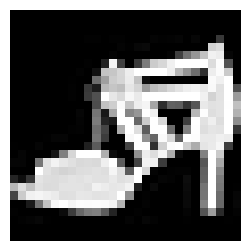

In [10]:
print(f"Image shape: {image.shape}")
print(f"Label : {label}")
plt.figure(figsize=(3,3))
plt.imshow(image.permute(1,2,0), cmap = 'gray')
plt.axis('off')
plt.show()

In [11]:
len(train_ds)

50000

In [12]:
train_ds.dataset.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [1]:
def plot_dataset(rows, columns, dataset,figsize=(6,6), dpi=100):
    plt.figure(figsize=figsize, dpi=dpi)
    classes = dataset.dataset.classes
    for i in range(1, rows*columns+1):
        rand_idx = torch.randint(low = 0, high = len(dataset), size = [1]).item()
        image, label = dataset[rand_idx]
        plt.subplot(rows, columns, i)
        plt.title(f"{classes[label]}: {label}")
        plt.axis(False)
        plt.imshow(image.squeeze(), cmap = 'gray')
    plt.show()

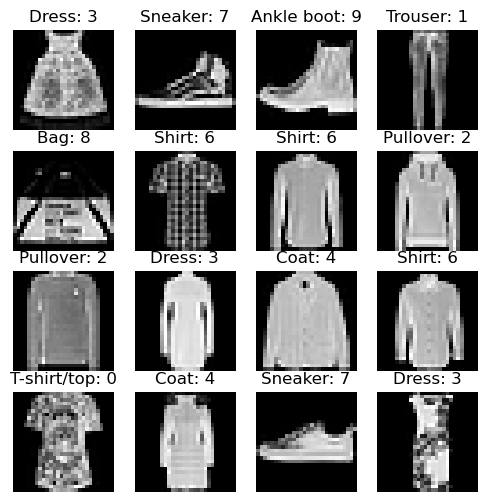

In [14]:
plot_dataset(4,4,train_ds)

### Dataloader

In [15]:
batch_size = 128

In [16]:
train_dl = DataLoader(dataset = train_ds, batch_size=batch_size, shuffle=True)
valid_dl = DataLoader(dataset = valid_ds, batch_size = batch_size*2, shuffle= False)
test_dl = DataLoader(dataset = test_ds, batch_size=batch_size*2, shuffle = False)

In [17]:
for xb, yb in train_dl:
    print(f"Image shape: {xb.shape}")
    print(f"label shape: {yb.shape}")
    break

Image shape: torch.Size([128, 1, 28, 28])
label shape: torch.Size([128])


In [18]:
## 50000 train data; 128 batch size; 
print(f"Total {len(train_dl)} training batches with batch size of {batch_size}")
## 10000 test data; 128 batch size; 
print(f"Total {len(test_dl)} test batches with batch size of {batch_size}")

Total 391 training batches with batch size of 128
Total 40 test batches with batch size of 128


### Visualization of a batch

In [19]:
from torchvision.utils import make_grid

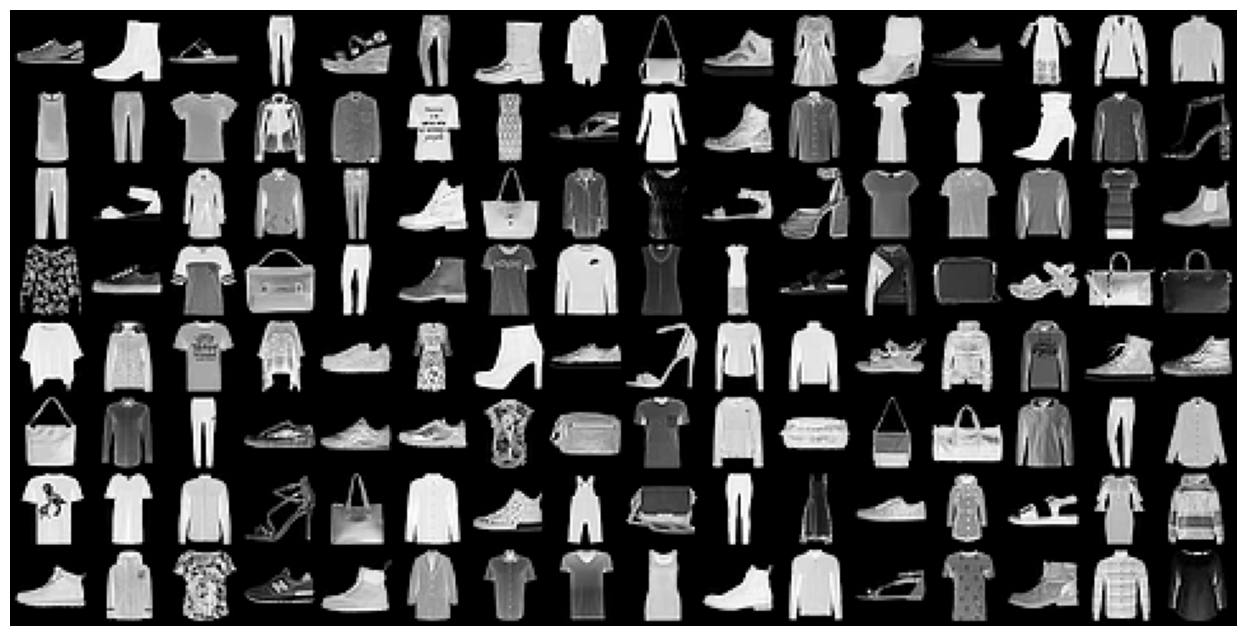

In [20]:
for xb, yb in train_dl:
    plt.figure(figsize = (16, 8)) ## batch = 128 = 16*8
    plt.imshow(make_grid(xb, nrow=16).permute(1,2,0), cmap = 'gray')
    plt.axis('off')   
    plt.show()
    break

### Concept of Flatten Layer

In [21]:
flatten_layer = nn.Flatten()
flatten_layer

Flatten(start_dim=1, end_dim=-1)

In [22]:
## Checking the train_dataloader
train_features_batch, train_labels_batch = next(iter(train_dl))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

In [23]:
## let's take a sample image and flatten it
x = train_features_batch[0]
print(f"Shape before flattening: {x.shape}")

flatten_output = flatten_layer(x)
print(f"Shape after flattening: {flatten_output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [24]:
## removing the extra dimension
print(f"Shape after squeezing: {flatten_output.squeeze().shape}")

Shape after squeezing: torch.Size([784])


## Sample Baseline Model and Test with our data

In [25]:
len(train_ds.dataset.classes)

10

In [26]:
input_size = 1*28*28
num_classes = len(train_ds.dataset.classes)

In [27]:
## We'll build a sequential model

class FashionMnistModel_V0(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.layer_stack = nn.Sequential(nn.Flatten(),
                                         nn.Linear(in_features=input_size, out_features=16),
                                         nn.Linear(in_features=16, out_features=num_classes)
                                         )     
                
    def forward(self, xb):
        return self.layer_stack(xb)

In [28]:
torch.manual_seed(42)
model_0 = FashionMnistModel_V0(input_size,num_classes)
model_0

FashionMnistModel_V0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [29]:
for xb, yb in train_dl:
    print(f"Image shape: {xb.shape}")
    print(f"label shape: {yb.shape}")
    logits = model_0(xb)
    break

Image shape: torch.Size([128, 1, 28, 28])
label shape: torch.Size([128])


In [30]:
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [31]:
loss = loss_fn(logits, yb)
loss

tensor(2.2995, grad_fn=<NllLossBackward0>)

In [32]:
logits

tensor([[ 0.1227, -0.2419, -0.1929,  ..., -0.2435, -0.0966,  0.0461],
        [-0.0481, -0.3592,  0.2557,  ..., -0.3902,  0.0428,  0.1276],
        [ 0.0554, -0.3868,  0.0228,  ..., -0.5040, -0.1012,  0.0247],
        ...,
        [ 0.1261, -0.1808, -0.1126,  ..., -0.2938, -0.0059,  0.1052],
        [ 0.1044, -0.3006, -0.0107,  ..., -0.6061,  0.1888,  0.0542],
        [ 0.0718, -0.2017, -0.0289,  ..., -0.4237, -0.0402,  0.0930]],
       grad_fn=<AddmmBackward0>)

In [33]:
logits.shape, yb.shape

(torch.Size([128, 10]), torch.Size([128]))

In [34]:
## for finding accuracy we need to turn logits to predictions
values, preds = torch.max(logits, dim=1)

In [35]:
values

tensor([0.1227, 0.2557, 0.0554, 0.1061, 0.2391, 0.1483, 0.1887, 0.1239, 0.1476,
        0.2088, 0.1190, 0.1048, 0.1601, 0.0753, 0.1653, 0.1599, 0.1534, 0.1194,
        0.1237, 0.1523, 0.1166, 0.1872, 0.1747, 0.1937, 0.1589, 0.1630, 0.2114,
        0.1473, 0.2820, 0.1532, 0.2127, 0.1644, 0.1382, 0.1090, 0.1732, 0.1444,
        0.1244, 0.2711, 0.1378, 0.1925, 0.1596, 0.1477, 0.1020, 0.2330, 0.2068,
        0.2703, 0.1691, 0.1551, 0.1569, 0.1585, 0.1849, 0.2598, 0.1221, 0.2181,
        0.1980, 0.1693, 0.1784, 0.2690, 0.1395, 0.1774, 0.2027, 0.1207, 0.2090,
        0.1232, 0.2505, 0.1846, 0.2337, 0.1667, 0.1726, 0.2009, 0.0994, 0.1190,
        0.1794, 0.1893, 0.1228, 0.1793, 0.1630, 0.1386, 0.1618, 0.1664, 0.1219,
        0.1171, 0.1436, 0.1070, 0.1534, 0.2625, 0.2404, 0.1099, 0.2362, 0.1443,
        0.1194, 0.1051, 0.3415, 0.2341, 0.2263, 0.1328, 0.0633, 0.1403, 0.0946,
        0.1411, 0.2412, 0.1068, 0.1673, 0.2393, 0.0971, 0.1489, 0.1280, 0.1806,
        0.1499, 0.2093, 0.2579, 0.1480, 

In [36]:
preds, preds.shape

(tensor([0, 2, 0, 9, 3, 3, 3, 8, 0, 9, 3, 0, 6, 9, 9, 6, 8, 0, 8, 9, 3, 9, 8, 9,
         9, 8, 9, 9, 6, 6, 6, 6, 9, 9, 9, 8, 3, 3, 9, 6, 9, 8, 0, 6, 9, 9, 9, 6,
         9, 0, 0, 6, 9, 6, 8, 6, 6, 6, 9, 6, 9, 9, 6, 9, 6, 9, 8, 3, 6, 8, 6, 9,
         9, 8, 9, 6, 9, 0, 8, 9, 8, 0, 9, 9, 6, 6, 9, 0, 9, 6, 8, 9, 9, 2, 9, 9,
         5, 9, 0, 9, 8, 9, 3, 9, 0, 8, 0, 6, 0, 9, 9, 9, 9, 9, 9, 8, 9, 6, 9, 9,
         0, 9, 0, 6, 6, 0, 8, 6]),
 torch.Size([128]))

In [37]:
def accuracy(logits, labels):
    _, preds = torch.max(logits, dim=1)
    accuracy = torch.sum(preds==labels).item()/len(labels)
    return torch.tensor(accuracy)

In [38]:
accuracy(logits=logits, labels=yb)

tensor(0.0703)

## Necessary functions

In [39]:
from tqdm.auto import tqdm

In [40]:
def fit(epochs, model, train_loader, val_loader, lr, opt_func = torch.optim.SGD):
    
    optimizer = opt_func(model.parameters(), lr)
    train_loss = []
    train_acc = []
    history = []
    for epoch in range(epochs):
        ## Training
        for batch in tqdm(train_loader):
            model.train()
            loss, acc = model.training_step(batch)
            train_loss.append(loss)
            train_acc.append(acc)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        ## Testing
        model.eval()
        with torch.inference_mode():
            result = evaluate(model, valid_dl)
            result['train_loss'] = torch.stack(train_loss).mean()
            result['train_acc'] = torch.stack(train_acc).mean()
            model.epoch_end(epoch, result)
            history.append(result)
    return history

In [41]:
class FashionMnistModel_V1(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=input_size, out_features=128)
        # self.layer_2 = nn.Linear(in_features=32, out_features=64)
        self.layer_2 = nn.Linear(in_features=128, out_features=num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, xb):
        xb = xb.view(-1, (1*28*28))
        xb = self.layer_1(xb)
        xb = self.relu(xb)
        xb = self.layer_2(xb)
        # xb = self.relu(xb)
        # xb = self.layer_3(xb)
        return xb
    
    def training_step(self, batch):
        xb,yb = batch
        logits = self(xb)
        loss = loss_fn(logits, yb)
        acc = accuracy(logits, yb)
        return loss, acc
    
    def validation_step(self, batch):
        xb,yb = batch
        logits = self(xb)
        loss = loss_fn(logits, yb)
        acc = accuracy(logits, yb)
        return {'val/test_loss': loss, 'val/test_acc': acc}
    
    def validation_epoch_end(self, result):
        batch_loss = [x['val/test_loss'] for x in result]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [x['val/test_acc'] for x in result]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss': epoch_loss.item(), 'val_accuracy': epoch_acc.item()}
    
    def epoch_end(self, epoch, end_result):
        print(f"Epoch [{epoch+1}] | Training Loss: {end_result['train_loss']:.4f} | Training Accuracy: {end_result['train_acc']:.4f} | Validation/Test Loss: {end_result['val_loss']:.4f} | Validation/Test Accuracy: {end_result['val_accuracy']:.4f}")

In [42]:
def evaluate(model, dataloader):
    preds = [model.validation_step(batch) for batch in dataloader]
    return model.validation_epoch_end(preds)

In [43]:
model = FashionMnistModel_V1(input_size, num_classes)
model

FashionMnistModel_V1(
  (layer_1): Linear(in_features=784, out_features=128, bias=True)
  (layer_2): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU()
)

In [44]:
evaluate(model, valid_dl)

{'val_loss': 2.3037919998168945, 'val_accuracy': 0.07236327975988388}

In [45]:
history = fit(epochs=20, model = model, train_loader=train_dl, val_loader=valid_dl,lr = 0.1)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 0.7683 | Training Accuracy: 0.7359 | Validation/Test Loss: 0.5230 | Validation/Test Accuracy: 0.8192


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 0.6401 | Training Accuracy: 0.7786 | Validation/Test Loss: 0.5153 | Validation/Test Accuracy: 0.8183


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 0.5801 | Training Accuracy: 0.7984 | Validation/Test Loss: 0.5040 | Validation/Test Accuracy: 0.8193


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 0.5423 | Training Accuracy: 0.8107 | Validation/Test Loss: 0.3996 | Validation/Test Accuracy: 0.8586


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 0.5150 | Training Accuracy: 0.8198 | Validation/Test Loss: 0.4180 | Validation/Test Accuracy: 0.8494


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [6] | Training Loss: 0.4938 | Training Accuracy: 0.8268 | Validation/Test Loss: 0.3792 | Validation/Test Accuracy: 0.8618


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [7] | Training Loss: 0.4765 | Training Accuracy: 0.8326 | Validation/Test Loss: 0.3782 | Validation/Test Accuracy: 0.8656


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [8] | Training Loss: 0.4619 | Training Accuracy: 0.8374 | Validation/Test Loss: 0.3743 | Validation/Test Accuracy: 0.8687


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [9] | Training Loss: 0.4497 | Training Accuracy: 0.8414 | Validation/Test Loss: 0.3722 | Validation/Test Accuracy: 0.8641


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [10] | Training Loss: 0.4389 | Training Accuracy: 0.8451 | Validation/Test Loss: 0.3396 | Validation/Test Accuracy: 0.8784


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [11] | Training Loss: 0.4294 | Training Accuracy: 0.8482 | Validation/Test Loss: 0.3522 | Validation/Test Accuracy: 0.8731


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [12] | Training Loss: 0.4208 | Training Accuracy: 0.8511 | Validation/Test Loss: 0.3555 | Validation/Test Accuracy: 0.8716


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [13] | Training Loss: 0.4129 | Training Accuracy: 0.8537 | Validation/Test Loss: 0.3608 | Validation/Test Accuracy: 0.8718


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [14] | Training Loss: 0.4057 | Training Accuracy: 0.8561 | Validation/Test Loss: 0.3349 | Validation/Test Accuracy: 0.8818


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [15] | Training Loss: 0.3990 | Training Accuracy: 0.8584 | Validation/Test Loss: 0.3251 | Validation/Test Accuracy: 0.8822


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [16] | Training Loss: 0.3929 | Training Accuracy: 0.8604 | Validation/Test Loss: 0.3178 | Validation/Test Accuracy: 0.8836


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [17] | Training Loss: 0.3872 | Training Accuracy: 0.8623 | Validation/Test Loss: 0.3220 | Validation/Test Accuracy: 0.8846


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [18] | Training Loss: 0.3818 | Training Accuracy: 0.8641 | Validation/Test Loss: 0.3367 | Validation/Test Accuracy: 0.8778


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [19] | Training Loss: 0.3768 | Training Accuracy: 0.8657 | Validation/Test Loss: 0.3336 | Validation/Test Accuracy: 0.8800


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [20] | Training Loss: 0.3720 | Training Accuracy: 0.8674 | Validation/Test Loss: 0.3293 | Validation/Test Accuracy: 0.8820


In [46]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '--b')
    plt.plot(val_losses, '-r')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

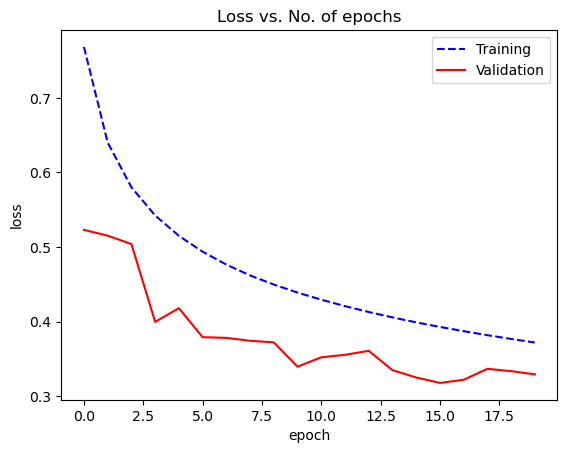

In [47]:
plot_losses(history)

In [48]:
def plot_accuracies(history):
    train_accuracies = [x['train_acc'] for x in history]
    val_accuracies = [x['val_accuracy'] for x in history]
    plt.plot(train_accuracies, '--b')
    plt.plot(val_accuracies, '-r')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Training', 'Validation'])
    plt.title('Accuracy vs. No. of epochs');

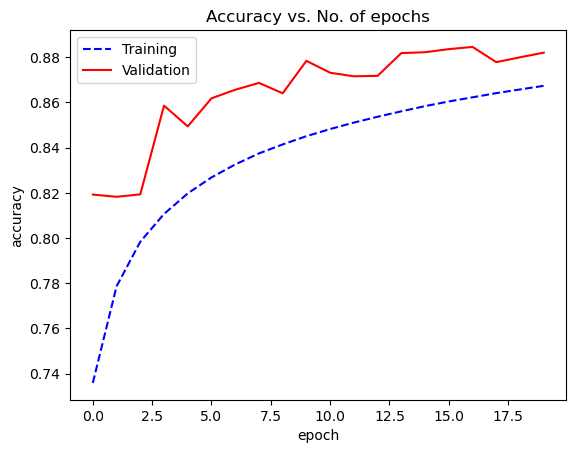

In [49]:
plot_accuracies(history)

## CNN Model(tinyvgg)

In [50]:
class FashionMnistModel_V1(nn.Module):
    def __init__(self, input_channels, num_classes):
        super().__init__()
        #### BLOCK -1 #####
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_channels, out_channels=16,
                     kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=16, out_channels=16,
                     kernel_size=3, stride=1, padding=1),
            
        
            nn.MaxPool2d(kernel_size=2, stride=2)    ## output: 16*14*14   
                
        )
        
        
        #### BLOCK -2 #####
        
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=16,
                     kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels=16, out_channels=16,
                     kernel_size=3, stride=1, padding=1),
            
        
            nn.MaxPool2d(kernel_size=2, stride=2)      ## output:16* 7*7
                
        )
        
        ## Fully connected nn
        self.classifier_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=16 * 7 * 7,
                      out_features=num_classes)
        )
             
     
    def forward(self, x):
        x = self.conv_block_1(x)
        #print(x.shape)
        x = self.conv_block_2(x)
        #print(x.shape)
        x = self.classifier_layer(x)
        return x
    
    def training_step(self, batch):
        xb,yb = batch
        logits = self(xb)
        loss = loss_fn(logits, yb)
        acc = accuracy(logits, yb)
        return loss, acc
    
    def validation_step(self, batch):
        xb,yb = batch
        logits = self(xb)
        loss = loss_fn(logits, yb)
        acc = accuracy(logits, yb)
        return {'val/test_loss': loss, 'val/test_acc': acc}
    
    def validation_epoch_end(self, result):
        batch_loss = [x['val/test_loss'] for x in result]
        epoch_loss = torch.stack(batch_loss).mean()
        batch_acc = [x['val/test_acc'] for x in result]
        epoch_acc = torch.stack(batch_acc).mean()
        return {'val_loss': epoch_loss.item(), 'val_accuracy': epoch_acc.item()}
    
    def epoch_end(self, epoch, end_result):
        print(f"Epoch [{epoch+1}] | Training Loss: {end_result['train_loss']:.4f} | Training Accuracy: {end_result['train_acc']:.4f} | Validation/Test Loss: {end_result['val_loss']:.4f} | Validation/Test Accuracy: {end_result['val_accuracy']:.4f}")

In [62]:
model_1 = FashionMnistModel_V1(1, num_classes)

In [63]:
## Check our model produces the desired output
for img, label in train_dl:
    print(f"Image shape before using our model: {img.shape}")
    out = model_1(img)
    print(f"Image shape after using our model: {out.shape}\n")
    print(f"Checking the first output:\n{out[0]}")
    break

Image shape before using our model: torch.Size([128, 1, 28, 28])
Image shape after using our model: torch.Size([128, 10])

Checking the first output:
tensor([ 0.0013,  0.0952, -0.0749,  0.0476,  0.0720,  0.0027, -0.0110,  0.0353,
         0.0304,  0.0084], grad_fn=<SelectBackward0>)


In [64]:
## check our evaluation 
evaluate(model_1, valid_dl)

{'val_loss': 2.3032662868499756, 'val_accuracy': 0.10087890923023224}

In [65]:
epochs = 5

In [66]:
history_1 = fit(epochs, model_1, train_dl, valid_dl, lr=0.001, opt_func = torch.optim.Adam)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 0.6667 | Training Accuracy: 0.7582 | Validation/Test Loss: 0.4672 | Validation/Test Accuracy: 0.8331


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 0.5363 | Training Accuracy: 0.8058 | Validation/Test Loss: 0.3766 | Validation/Test Accuracy: 0.8618


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 0.4749 | Training Accuracy: 0.8283 | Validation/Test Loss: 0.3353 | Validation/Test Accuracy: 0.8793


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 0.4363 | Training Accuracy: 0.8421 | Validation/Test Loss: 0.3042 | Validation/Test Accuracy: 0.8874


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 0.4087 | Training Accuracy: 0.8523 | Validation/Test Loss: 0.3023 | Validation/Test Accuracy: 0.8912


In [67]:
history_1 += fit(epochs, model_1, train_dl, valid_dl, lr=0.003, opt_func = torch.optim.Adam)

  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [1] | Training Loss: 0.3200 | Training Accuracy: 0.8855 | Validation/Test Loss: 0.2892 | Validation/Test Accuracy: 0.8947


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [2] | Training Loss: 0.2984 | Training Accuracy: 0.8927 | Validation/Test Loss: 0.2835 | Validation/Test Accuracy: 0.8982


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [3] | Training Loss: 0.2832 | Training Accuracy: 0.8976 | Validation/Test Loss: 0.2631 | Validation/Test Accuracy: 0.9094


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [4] | Training Loss: 0.2713 | Training Accuracy: 0.9020 | Validation/Test Loss: 0.2579 | Validation/Test Accuracy: 0.9095


  0%|          | 0/391 [00:00<?, ?it/s]

Epoch [5] | Training Loss: 0.2608 | Training Accuracy: 0.9059 | Validation/Test Loss: 0.2626 | Validation/Test Accuracy: 0.9042


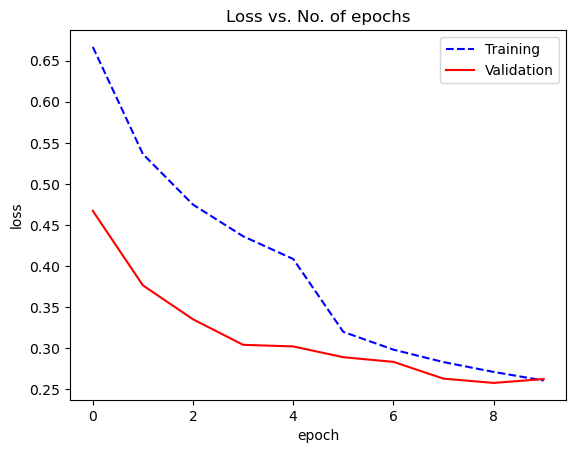

In [68]:
plot_losses(history_1)

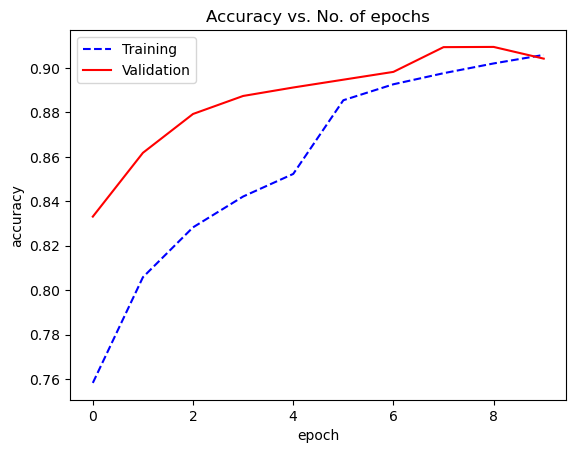

In [69]:
plot_accuracies(history_1)

### Test set Evaluation

In [70]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = img.unsqueeze(0)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return test_ds.classes[preds[0].item()]

Label: Ankle boot , Predicted: Ankle boot


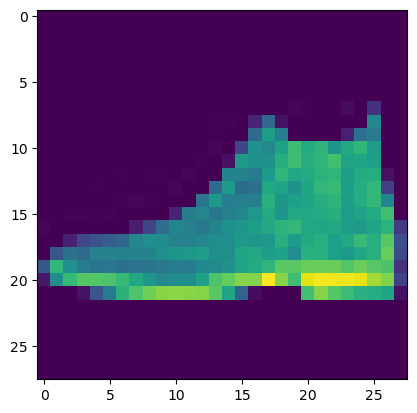

In [71]:
img, label = test_ds[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model_1))

Label: Dress , Predicted: Dress


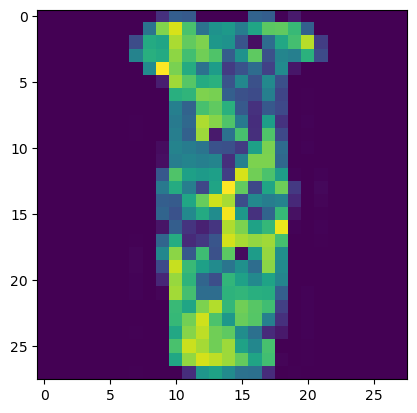

In [72]:
img, label = test_ds[100]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_ds.classes[label], ', Predicted:', predict_image(img, model_1))

In [73]:
result = evaluate(model_1, test_dl)
result

{'val_loss': 0.275643527507782, 'val_accuracy': 0.9002929925918579}

In [77]:
## Saving and Loading
from pathlib import Path

## Set model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)


## Create model save path
MODEL_NAME = 'FashionMnist-CNN.pth'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME
torch.save(obj=model_1.state_dict(), f = MODEL_SAVE_PATH)

In [79]:
## Loading
loaded_model = FashionMnistModel_V1(1, num_classes)
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
loaded_model

FashionMnistModel_V1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
  )
)

In [80]:
evaluate(loaded_model, test_dl)

{'val_loss': 0.275643527507782, 'val_accuracy': 0.9002929925918579}